# Mastering Multiple Models

**In this webinar:**

1. Tree Based Classifiers
    - Decision Trees
    - Random Forest
2. Support Vector Classifier
3. Naive Bayes Classifier
4. K-Nearest Neighbors Classifier
5. K-Fold Cross Validation

**Objectives:**

- Understand and explain (at a high level) how each classifier works
- Apply code for more efficient model training and testing
- Apply K-fold cross validation to any trained model

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## 1. Tree Based Classifiers

### 1.1 Decision Tree Classifier

Decision tree classifiers work in very much the same way as they do for regression. The tree is constructed from a root node, and by continous binary splitting, creating decision nodes and leaf nodes. New data points pass through the nodes in the tree to reach a prediction for that data point. 

![](https://images.datacamp.com/image/upload/f_auto,q_auto:best/v1545933328/output_65_0_jteora.png)

We can alter some properties of the tree to see how it affects performance - such as `max_depth` (the maximum depth of the tree). You can read about all the different parameters of Decision Trees [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Overfitting is a common problem for decision trees, as it can become too fitted and detailed to the training data, therefore dropping in performance on unseen data.

### 1.2 Random Forest Classifier

The random forest is an ensemble method built on decision trees. It is a non-parametric algorithm that aggregates the result of multiple decision trees. This help to alleviate the issue of overfitting experienced by using a decision tree alone. The output is the mode of the classes (classification) or mean prediction (regression) of the individual trees.


![](https://miro.medium.com/v2/resize:fit:592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

For the Random Forest algorithm we can also tune parameters to improve the model, such as `n_estimators` (number of trees to include in forest) or `max_depth` (maximum depth of the tree, similar to what we use with a Decision Tree)


## 2. Support Vector Classifier

SVM plots data as points in space and will look for the widest, clearest gap between points belonging to each class in your data. The boundary created by the SVM here is known as the **hyperplane**. When a new data point is encountered, it will use this hyperplane and the margin around it to classify the new data point, depending on which side of the margin it is closest to.

The term 'support vectors' are the data points that line the edge of the margin of the hyperplane.

SVM is useful when working with data that is not linearly separable or has noise. It can handle both categorical and continuous data, and can handle both linear and non-linear problems. SVM is less prone to overfitting and can handle high dimensional data (data with many features).

![](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png)

## 3. Naive Bayes Classifier

Naive Bayes makes use of Bayes' Theorem to classify data points into classes, based on probabilities. 

Naive Bayes assumes that all features are independent of each other, an assumption that often does not hold in the real world (hence the name 'Naive'!). Despite this, it's still a popular algorithm, and is widely used. It can be used for both categorical and continuous data, and can work well with a smaller amount of training data if the assumption of independence is upheld.

![](https://i0.wp.com/innovationyourself.com/wp-content/uploads/2023/10/Implementing-Naive-Bayes-Classification-using-Python-1-1.webp)

$$P(spam \mid words) = \frac{ P(words \mid spam) * P(spam) }{ P(words) }$$

## 4. K-Nearest Neighbors Classifier

KNN find the K nearest data points to the given input and predicts the target variable based on the mode or mean of the output values of those neighbours.

KNN is useful when working with data that is not linearly separable and when the model complexity is not a concern. It can handle both categorical and continuous data, and provides a simple method of imputation for missing values. KNN can however be computationally expensive and lacks robustness to different distance metrics (such as scaling).

- Choose K (number of neighbours)
- Choose distance metric, e.g. Euclidean distance
- For each data point in the testing data, calculate the distance (using your chosen distance metric) between the test point and training observations
- Find labels of the K closest data points to the testing point
- Assign most frequent (mode) class label to the testing point

![](https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png)

## 5. Building multiple models & k-fold cross validation!

We already are quite familiar with building models and the steps we need to go through to create these models, train them and make predictions. So let's try this out in a more efficient way, where we work on multiple models at once - saving us time and saving us from writing very similar code over and over again!

In [24]:
df_reviews = pd.read_csv('amazon_reviews.csv')
df_reviews = df_reviews.drop(columns = 'Unnamed: 0').dropna()

df_reviews.head()

,overall,reviewText
0,4,kids like story BUT while i really wanted a bo...
1,4,Bought this used and it came in great conditio...
2,5,Every story and book about Corduroy is Fantast...
3,5,I purchased this book for my first grade class...
4,5,Having spent numerous years in an elementary s...


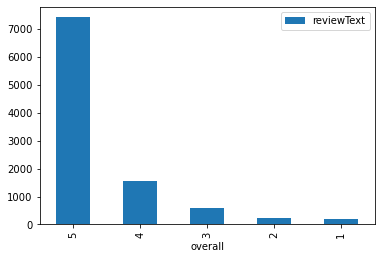

In [42]:
# Let's look at the distribution of ratings in our data

ratings = df_reviews[['overall', 'reviewText']].groupby('overall').count()

ratings.sort_values('overall', ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# Try out some more EDA to explore the data! Think: common words? Wordclouds?

In [ ]:
# Practice balancing the data, see if you can upsample/downsample across all classes...

In [ ]:
# Try out some more NLP steps to see if it improves any of them models' performance!

In [27]:
# Create a CountVectorizer instance 
vectorizer = CountVectorizer(stop_words = 'english')


# Fit and transform the documents, set up X and y
X = vectorizer.fit_transform(df_reviews['reviewText'])
y = np.array(df_reviews['overall'])


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [28]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'RBF SVM', 'Decision Tree', 'Random Forest',  'Naive Bayes']

classifiers = [
    LogisticRegression(multi_class = 'ovr'),
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10),
    MultinomialNB()
]

In [29]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers): 
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')
    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 
                                         'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
... All done!


In [31]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.901088,0.908648,0.901088,0.892292,0.707333,1.025986
Naive Bayes,0.807803,0.822682,0.807803,0.764061,0.673536,0.001796
RBF SVM,0.985119,0.985337,0.985119,0.984926,0.658826,13.622875
Nearest Neighbors,0.803926,0.792985,0.803926,0.772123,0.656383,0.000320
Decision Tree,0.751907,0.718104,0.751907,0.662814,0.652517,0.075273
Random Forest,0.742278,0.550977,0.742278,0.632479,0.637475,0.014062


### K-fold Validation

A common approach to validation called k-fold cross validation. In its simplest form, k-fold fits a single model to a number of different versions of the test-train split and compares how volatile the results of the model are. In the below image, we use a 5 'folds' for the validation:


![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [47]:
model = models['Naive Bayes']
print(cross_val_score(model, X, y, scoring = 'f1_weighted', cv = 10))

[0.63023124 0.66552068 0.67453091 0.66979999 0.62362187 0.65683526
 0.65545829 0.66993233 0.67413399 0.67474388]


**Coming up next time:**

Hyperparameter tuning & GridSearchCV!